# Analisi del Judge


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

flnm = './data/llama3_metrics.json'
# Open and read the JSON file
with open(flnm, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Format data like this: "category":<Nome LLM>, "total":<Somma documenti Usati> in Tutti i K, "diff":{}
# [t.results.AI.metadata.source_type for t in test_output_dicts]
# data = [
#     {"category": "theory", "total": 10, "diff": {"easy": 9, "medium": 1, "hard": 0}},
#     ...
# ]
def remap_data(run_output_dict:dict):
    plot_data =  []

    unique_list_of_model_names = list(set([test_output_dict["model_name"] for test_output_dict in run_output_dict]))

    # for metric, settings in metrics.items():
    label_name = "LLM_judge"
    for model_name in unique_list_of_model_names:
        print(f"===> [PLOT] MODEL {model_name} <===")
        # Get all the test outputs for the current model
        test_output_dicts = [test_output_dict for test_output_dict in run_output_dict if test_output_dict["model_name"] == model_name]

        for test_output_dict in test_output_dicts:
            X, Y = [],[]
            # The ith element of X is the number of documents retrieved for the ith test output with the average metric
            # Append the number of documents retrieved
            K_curr = test_output_dict["K_documents_retrieved"]

            # Get the mean metric for the current test output
            results = test_output_dict["results"]
            for i, res_obj in enumerate(results):
              # print(res_obj["AI"].keys())
              X.append(i)
              Y.append(res_obj["AI"]["judge_llm"])

            plot_data.append({"model_name":model_name, "K":K_curr, "X":X, "Y":Y})

    return plot_data

data = remap_data(data)
print(len(data)) # 13

print(data[0]["X"]) # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
print(list(len(data[i]["X"]) for i in range(len(data)))) # [101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]

print(data[0]["Y"]) # [4, 4, 4, 5, 3, 4, 4, 4, 3, 3, 3, 3, 2, 5, 3, 3, 2, 3, 3, 2, 2, 3, 5, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 5, 2, 2, 2, 1, 2, 1, 1, 1, 3, 4, 3, 3, 3, 4, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 4, 3, 3, 3, 1, 3, 4, 3, 4, 3, 3, 4, 2, 4, 3, 2, 2, 4, 3, 5, 4, 4, 2, 3, 3, 5, 4, 4, 3, 3, 2, 1, 3, 2, 4, 3]
print(list(len(data[i]["Y"]) for i in range(len(data)))) # [101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]

===> [PLOT] MODEL Llama-3-8B-16K.Q4_0.gguf <===
13
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]
[4, 4, 4, 5, 3, 4, 4, 4, 3, 3, 3, 3, 2, 5, 3, 3, 2, 3, 3, 2, 2, 3, 5, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 5, 2, 2, 2, 1, 2, 1, 1, 1, 3, 4, 3, 3, 3, 4, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 4, 3, 3, 3, 1, 3, 4, 3, 4, 3, 3, 4, 2, 4, 3, 2, 2, 4, 3, 5, 4, 4, 2, 3, 3, 5, 4, 4, 3, 3, 2, 1, 3, 2, 4, 3]
[101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]


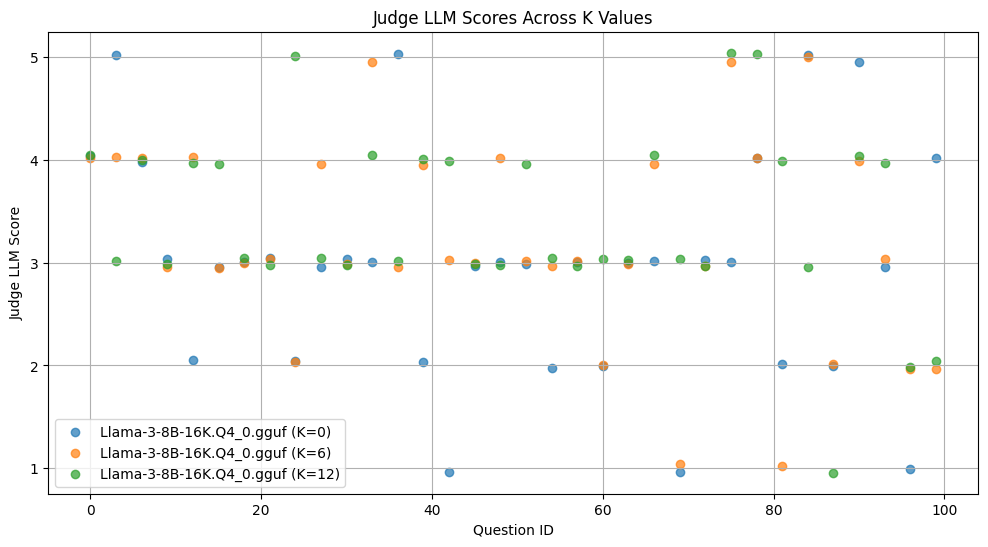

In [2]:
def plot_data(data, skip_interval=1, jitter=0.05):
    plt.figure(figsize=(12, 6))

    for entry in data:
        model_name = entry["model_name"]
        K = entry["K"]
        X = entry["X"]
        Y = entry["Y"]
        label = f"{model_name} (K={K})"

        X_filtered = X[::skip_interval]
        Y_filtered = Y[::skip_interval]

        X_jittered = np.array(X_filtered) + np.random.uniform(-jitter, jitter, len(X_filtered))
        Y_jittered = np.array(Y_filtered) + np.random.uniform(-jitter, jitter, len(Y_filtered))
        # plt.plot(X_jittered, Y_jittered, label=label, alpha=0.7)
        plt.scatter(X_filtered, Y_jittered, label=label, alpha=0.7)

    plt.xlabel("Question ID")
    plt.ylabel("Judge LLM Score")
    plt.title("Judge LLM Scores Across K Values")
    plt.yticks([1, 2, 3, 4, 5])
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
data2 = [data[i] for i in range(0,13,6)]
plot_data(data2, skip_interval=3)

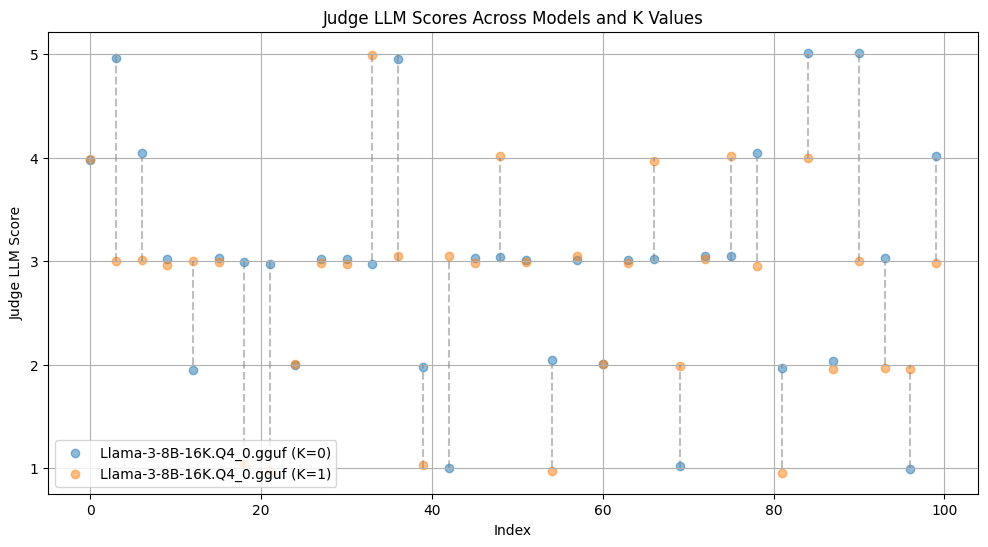

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, skip_interval=4, jitter=0.1):
    plt.figure(figsize=(12, 6))

    question_scores = {}

    for entry in data:
        X = entry["X"]
        Y = entry["Y"]
        for x, y in zip(X, Y):
            if x not in question_scores:
                question_scores[x] = []
            question_scores[x].append(y)

    X_filtered = sorted(set(x for entry in data for x in entry["X"]))[::skip_interval]

    # Add vertical bars only for question IDs in the skip interval
    for q_id in X_filtered:
        if q_id in question_scores:
            plt.vlines(x=q_id, ymin=min(question_scores[q_id]), ymax=max(question_scores[q_id]), color='gray', linestyle='--', alpha=0.5)


    for entry in data:
        model_name = entry["model_name"]
        K = entry["K"]
        X = entry["X"]
        Y = entry["Y"]
        label = f"{model_name} (K={K})"

        X_filtered_points = X[::skip_interval]
        Y_filtered_points = Y[::skip_interval]

        # Apply jitter to avoid overlapping points
        X_jittered = np.array(X_filtered_points) + np.random.uniform(-jitter, jitter, len(X_filtered_points))
        Y_jittered = np.array(Y_filtered_points) + np.random.uniform(-jitter, jitter, len(Y_filtered_points))

        plt.scatter(X_filtered_points, Y_jittered, label=label, alpha=0.5)

    plt.xlabel("Index")
    plt.ylabel("Judge LLM Score")
    plt.title("Judge LLM Scores Across Models and K Values")
    plt.yticks([1, 2, 3, 4, 5])
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

# Example usage
data2 = [data[i] for i in [0,1 ]]
plot_data(data2, skip_interval=3, jitter=0.05)


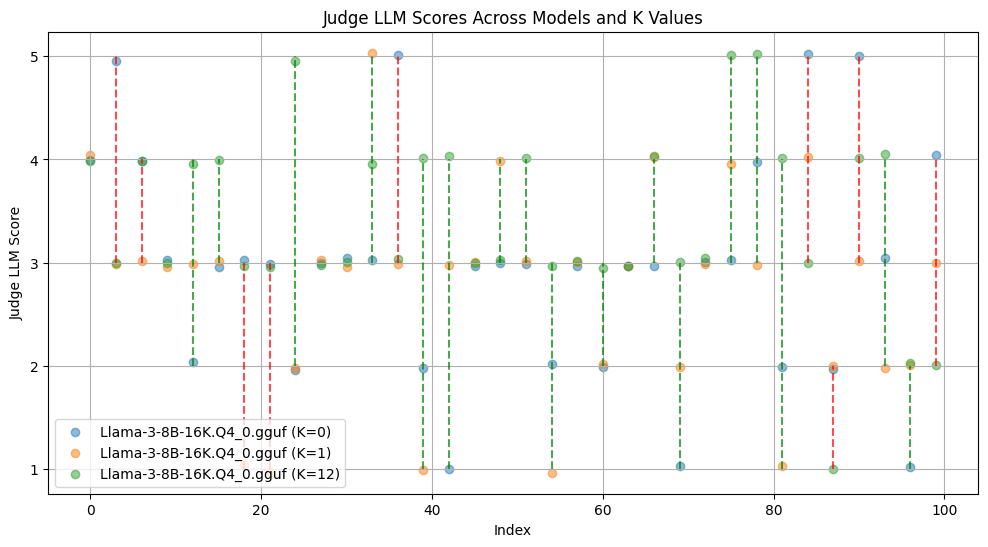

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, skip_interval=4, jitter=0.1):
    plt.figure(figsize=(12, 6))

    question_scores = {}
    question_Ks = {}

    for entry in data:
        X = entry["X"]
        Y = entry["Y"]
        K = entry["K"]
        for x, y in zip(X, Y):
            if x not in question_scores:
                question_scores[x] = []
                question_Ks[x] = []
            question_scores[x].append(y)
            question_Ks[x].append(K)

    X_filtered = sorted(set(x for entry in data for x in entry["X"]))[::skip_interval]

    # Add vertical bars only for question IDs in the skip interval
    for q_id in X_filtered:
        if q_id in question_scores:
            y_min = min(question_scores[q_id])
            y_max = max(question_scores[q_id])
            K_min = question_Ks[q_id][question_scores[q_id].index(y_min)]
            K_max = question_Ks[q_id][question_scores[q_id].index(y_max)]
            color = 'green' if K_max > K_min else 'red'
            plt.vlines(x=q_id, ymin=y_min, ymax=y_max, color=color, linestyle='--', alpha=0.7)


    for entry in data:
        model_name = entry["model_name"]
        K = entry["K"]
        X = entry["X"]
        Y = entry["Y"]
        label = f"{model_name} (K={K})"

        X_filtered_points = X[::skip_interval]
        Y_filtered_points = Y[::skip_interval]

        # Apply jitter to avoid overlapping points
        X_jittered = np.array(X_filtered_points) + np.random.uniform(-jitter, jitter, len(X_filtered_points))
        Y_jittered = np.array(Y_filtered_points) + np.random.uniform(-jitter, jitter, len(Y_filtered_points))

        plt.scatter(X_filtered_points, Y_jittered, label=label, alpha=0.5)

    plt.xlabel("Index")
    plt.ylabel("Judge LLM Score")
    plt.title("Judge LLM Scores Across Models and K Values")
    plt.yticks([1, 2, 3, 4, 5])
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

# Example usage
data2 = [data[i] for i in [0,1,12]]
plot_data(data2, skip_interval=3, jitter=0.05)


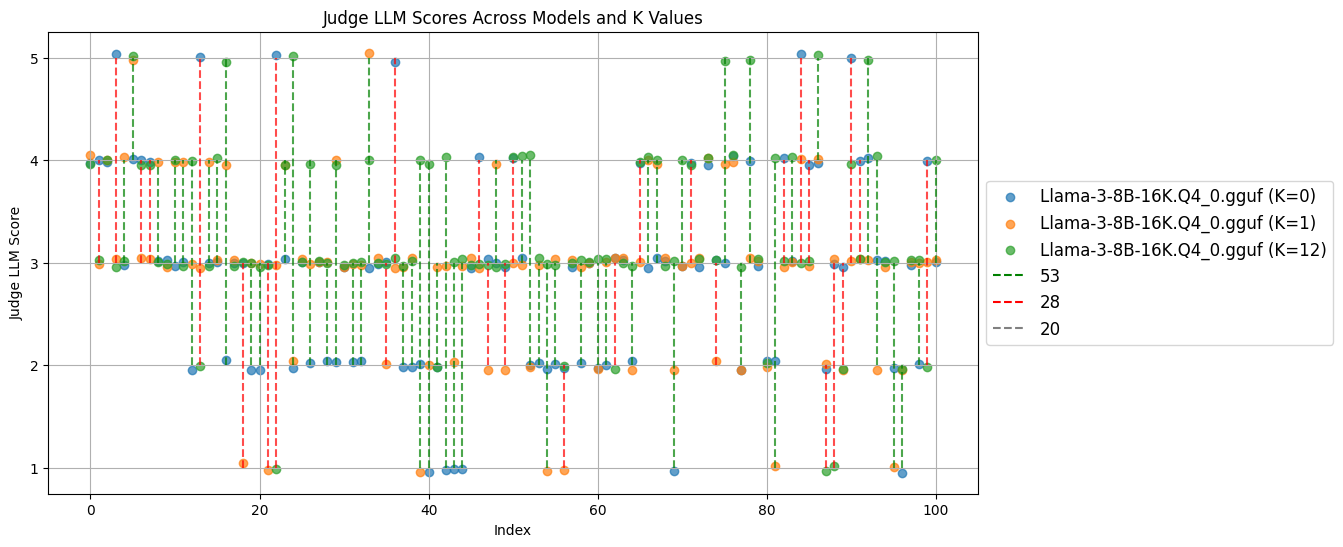

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, skip_interval=4, jitter=0.1):
    plt.figure(figsize=(12, 6))

    question_scores = {}
    question_Ks = {}
    green_line_count = 0  # Track the number of green lines
    red_line_count = 0    # Track the number of red lines
    gray_line_count = 0

    for entry in data:
        X = entry["X"]
        Y = entry["Y"]
        K = entry["K"]
        for x, y in zip(X, Y):
            if x not in question_scores:
                question_scores[x] = []
                question_Ks[x] = []
            question_scores[x].append(y)
            question_Ks[x].append(K)

    X_filtered = sorted(set(x for entry in data for x in entry["X"]))[::skip_interval]

    scatter_handles = []

    for entry in data:
        model_name = entry["model_name"]
        K = entry["K"]
        X = entry["X"]
        Y = entry["Y"]
        label = f"{model_name} (K={K})"

        X_filtered_points = X[::skip_interval]
        Y_filtered_points = Y[::skip_interval]

        # Apply jitter to avoid overlapping points
        X_jittered = np.array(X_filtered_points) + np.random.uniform(-jitter, jitter, len(X_filtered_points))
        Y_jittered = np.array(Y_filtered_points) + np.random.uniform(-jitter, jitter, len(Y_filtered_points))

        scatter_handle = plt.scatter(X_filtered_points, Y_jittered, label=label, alpha=0.7)
        scatter_handles.append(scatter_handle)

    # Add vertical bars only for question IDs in the skip interval
    for q_id in X_filtered:
        if q_id in question_scores:
            y_min = min(question_scores[q_id])
            y_max = max(question_scores[q_id])
            K_min = question_Ks[q_id][question_scores[q_id].index(y_min)]
            K_max = question_Ks[q_id][question_scores[q_id].index(y_max)]
            color = 'green' if K_max > K_min else 'red'
            color = 'gray' if K_max == K_min else color

            if color == 'green':
                green_line_count += 1  # Increment the green line counter
            elif color == 'red':
                red_line_count += 1  # Increment the red line counter
            elif color == 'gray':
                gray_line_count += 1
            plt.vlines(x=q_id, ymin=y_min, ymax=y_max, color=color, linestyle='--', alpha=0.7)

    plt.xlabel("Index")
    plt.ylabel("Judge LLM Score")
    plt.title("Judge LLM Scores Across Models and K Values")
    plt.yticks([1, 2, 3, 4, 5])

      # Create handles for the secondary legend (red/green lines)
    green_patch = plt.Line2D([0], [0], color="green", linestyle="--", label=f"{green_line_count}")
    red_patch = plt.Line2D([0], [0], color="red", linestyle="--", label=f"{red_line_count}")
    gray_patch = plt.Line2D([0], [0], color="gray", linestyle="--", label=f"{gray_line_count}")
    line_handles = [green_patch, red_patch, gray_patch]
    # Combine scatter and line legends
    all_handles = scatter_handles + line_handles
    all_labels = [handle.get_label() for handle in all_handles]

    plt.legend(handles=all_handles, labels=all_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.grid(True)
    plt.show()

# Example usage
data2 = [data[i] for i in [0,1,12]]
plot_data(data2, skip_interval=1, jitter=0.05)
